### XOR 문제 - 다층 퍼셉트론 구현하기
- 파이토치를 사용해서 다층 퍼셉트론을 구현하여 XOR 문제를 풀어보는 것을 시도
- 파이토치에서는 앞에서 배운 역전파가 아래의 두 줄의 코드로서 구현된다.

#### 1. 파이토치로 다층 퍼셉트론 구현하기 

In [1]:
import torch
import torch.nn as nn

(1) GPU 연산이 가능하다면 GPU 연산을 하도록 하고, 랜덤 시드를 고정해준다. 

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda' :
    torch.cuda.manual_seed_all(777)

(2) XOR 문제를 풀기 위한 입력과 출력을 정의해준다.

In [4]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1] ,[1] ,[0]]).to(device)

(3) 다층 퍼셉트론을 설계한다. 아래는 입력층, 은닉층1, 은닉층2, 은닉층3, 출력층을 가지는 은닉층이 3개인 인공 신경망이다. 

In [6]:
model = nn.Sequential(
            nn.Linear(2, 10, bias=True),
            nn.Sigmoid(),
            nn.Linear(10, 10, bias=True),
            nn.Sigmoid(),
            nn.Linear(10, 10, bias=True),
            nn.Sigmoid(),
            nn.Linear(10, 1, bias=True),
            nn.Sigmoid()
).to(device)

위 인공신경망을 그림으로 표현하면 아래와 같다. 

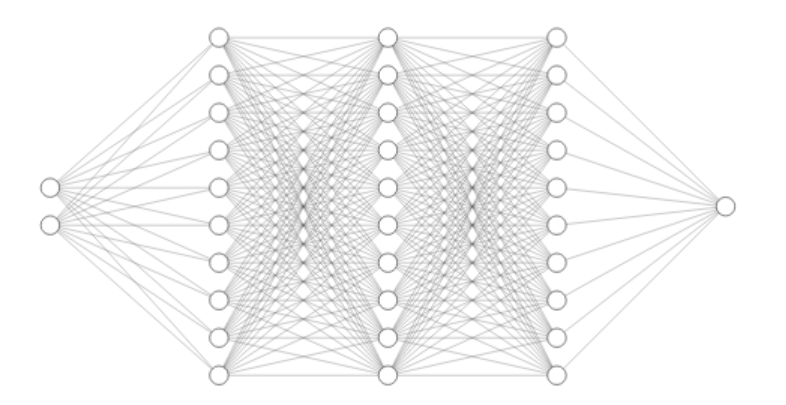

In [7]:
from IPython.display import Image
Image("p17.PNG")

(4) 비용함수와 옵티마이저를 선언한다. nn.BCELoss()는 이진 분류에서 사용하는 크로스엔트로피 함수이다. 

In [8]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)
# modified learning rate from 0.1 to 1

(5) 총 10,001번의 에포크를 수행한다. 각 에포크마다 역전파가 수행된다. 

In [9]:
for epoch in range(10001) : 
    optimizer.zero_grad()
    
    # forward 연산
    hypothesis = model(X)
    
    # 비용함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    
    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0 :
        print(epoch, cost.item())

0 0.7408947944641113
100 0.6931389570236206
200 0.6931374669075012
300 0.6931357383728027
400 0.6931341886520386
500 0.6931324601173401
600 0.693130612373352
700 0.6931287050247192
800 0.6931267976760864
900 0.6931246519088745
1000 0.6931224465370178
1100 0.693120002746582
1200 0.6931175589561462
1300 0.6931147575378418
1400 0.693111777305603
1500 0.6931085586547852
1600 0.6931051015853882
1700 0.6931012868881226
1800 0.6930969953536987
1900 0.6930922269821167
2000 0.6930870413780212
2100 0.693081259727478
2200 0.693074643611908
2300 0.6930671334266663
2400 0.6930585503578186
2500 0.6930487155914307
2600 0.693037211894989
2700 0.6930238008499146
2800 0.6930078268051147
2900 0.6929886937141418
3000 0.6929655075073242
3100 0.6929367780685425
3200 0.6929006576538086
3300 0.6928543448448181
3400 0.6927931904792786
3500 0.692710280418396
3600 0.6925929188728333
3700 0.6924187541007996
3800 0.6921424269676208
3900 0.6916618347167969
4000 0.6907041072845459
4100 0.6883158683776855
4200 0.6790

------------------------------------------------------------------------------------------------------------

#### 2. 학습된 다층 퍼셉트론의 예측값 확인하기
- 모델이 XOR 문제를 풀 수 있는지 테스트

In [19]:
with torch.no_grad() : 
    hypothesis = model(X)
    predicted = (hypothesis>0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis) : ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted) : ', predicted.detach().cpu().numpy())
    print('실제값(Y) : ', Y.cpu().numpy())
    print('정확도(Accuracy) : ', accuracy.item())

모델의 출력값(Hypothesis) :  [[6.8856578e-05]
 [9.9988139e-01]
 [9.9989223e-01]
 [1.5685637e-04]]
모델의 예측값(Predicted) :  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y) :  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy) :  1.0


- W.detach().cpu().numpy() 
    - graph에서 분리한 새로운 tensor를 리턴한다. 
    - 파이토치는 tensor에서 이루어진 모든 연산을 추적해서 기록해놓는다(graph). 
    - 이 연산 기록으로 부터 도함수가 계산되고 역전파가 이루어지게 된다. 
    - detach()는 이 **연산 기록으로 부터 분리한 tensor을 반환**하는 method이다.
- W.cpu().numpy() 
    - GPU 메모리에 올려져 있는 tensor를 cpu 메모리로 복사하는 method
- W.item() 
    - tensor를 numpy로 변환하여 반환
- .detach() .cpu() .numpy() 순서
    - 위에서 언급한대로, gradient가 계산될 tensor의 경우 graph로 기록되어있다(node는 Tensor, edge는 입력 Tensor로부터 출력 Tensor를 만들어내는 함수). 
    - 만약 .cpu().detach()를 수행하게 되면, cpu 를 만드는 edge가 생성된다. 이 edge는 곧 없어지긴 한다. 
    - 반면 .detach().cpu()의 경우 이 작업을 수행하지 않기 때문에 주로 .detach().cpu()를 사용한다. (하지만 사실상 별 차이 없을 것 같다.)

In [21]:
print(hypothesis)

tensor([[6.8857e-05],
        [9.9988e-01],
        [9.9989e-01],
        [1.5686e-04]])


In [12]:
print(predicted)

tensor([[0.],
        [1.],
        [1.],
        [0.]])
